In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def importa(archivo,nombres):
 data = pd.read_csv(archivo,sep=',',names=nombres,skiprows=0)#para archivo simple
 return data

In [3]:
data=importa('ANDOR.csv',['I1','I2','OR','AND'])
data

,I1,I2,OR,AND
0,1,1,1,1
1,0,1,1,0
2,1,0,1,0
3,0,0,0,0


In [4]:
h= np.array((np.random.rand(2,1),np.random.rand(2,1)))
h

array([[[0.81050935],
        [0.19719992]],

       [[0.90411421],
        [0.68487078]]])

In [5]:

def entrada(h,data,i):
      h[0][0]=data.I1[i] 
      h[0][1]=data.I2[i]
      return h[0]

In [6]:
for pos in range(len(data.I1)):
 h[0]=entrada(h,data,pos)
 print(h[0])

[[1.]
 [1.]]
[[0.]
 [1.]]
[[1.]
 [0.]]
[[0.]
 [0.]]


In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
  

In [8]:
w=np.array((np.random.rand(2,2)))
w

array([[0.62536605, 0.25925769],
       [0.67719364, 0.73146038]])

In [9]:
b=np.array((np.random.rand(2,1)))
b

array([[0.3548931],
       [0.1616432]])

In [10]:
z=w.dot(entrada(h,data,0))+b
z

array([[1.23951684],
       [1.57029723]])

In [11]:
h[1]=sigmoid(z)
h

array([[[1.        ],
        [1.        ]],

       [[0.7754799 ],
        [0.82782598]]])

In [12]:
i=2
y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])
y

array([[1],
       [0]], dtype=int64)

In [13]:
def MSE(y,h):
    return (y-h[1])**2
 

In [14]:
c=MSE(y,h)
c

array([[0.05040927],
       [0.68529585]])

In [15]:
np.mean(c)

0.3678525607821012

In [16]:
def dC(y,h,n):
    return (-2*(y[n]-h[1][n]))
    

In [17]:
def dh(z,n):
    return (sigmoid(z[n])*(1-sigmoid(z[n])))

In [18]:
def dz(h):
    return h[0]

In [19]:
h[0]=entrada(h,data,i)
n=0
Dw=np.transpose(dz(h)*dh(z,n)*dC(y,h,n))

In [20]:
Dw

array([[-0.07818276, -0.        ]])

In [21]:
Db=dh(z,n)*dC(y,h,n)
Db

array([-0.07818276])

In [22]:
h[0]=entrada(h,data,i)
y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])
y

array([[1],
       [0]], dtype=int64)

In [23]:
etha=.5
w=np.array((np.random.rand(2,2)))
b=np.array((np.random.rand(2,1)))
h= np.array((np.random.rand(2,1),np.random.rand(2,1)))
y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])

In [24]:

output_layer_nodes=2
epocs=200
for epoc in range(epocs):
 for i in data.index:
   h[0]=entrada(h,data,i)
   y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])
   z=w.dot(h[0])+b
   h[1]=sigmoid(z)
   c=MSE(y,h)
   #print(sum(c))
   for n in range(output_layer_nodes):
     Dw=etha*np.transpose(dz(h)*dh(z,n)*dC(y,h,n)) 
     w[n]=w[n]-Dw
     Db=etha*dh(z,n)*dC(y,h,n)
     b[n]=b[n]-Db  

In [25]:
c[1]

array([1.86180805e-05])

In [26]:
for _,I1 in enumerate(data.I1):
    print(i)

3
3
3
3


In [27]:
def predict(h,w):
      z=w.dot(h[0])+b
      h[1]=sigmoid(z)
      return(h[1])

In [28]:
for i in range (0,4,1):
 print(str(entrada(h,data,i))+ str(predict(h,w)))

[[1.]
 [1.]][[0.99873668]
 [0.83807868]]
[[0.]
 [1.]][[0.91731653]
 [0.12915483]]
[[1.]
 [0.]][[0.91671035]
 [0.1313666 ]]
[[0.]
 [0.]][[0.13379092]
 [0.00431479]]


In [29]:
i=0
h[0]=entrada(h,data,i)
print(h[0])
print(predict(h,w))

[[1.]
 [1.]]
[[0.99873668]
 [0.83807868]]


In [48]:
etha=1
w=np.array((np.random.rand(2,2)))
b=np.array((np.random.rand(2,1)))
h= np.array((np.random.rand(2,1),np.random.rand(2,1)))
output_layer_nodes=2
epocs=2000
criterio=1e-3
c=MSE(y,h)
costoOR=[]
costoAND=[]
print(c)
while (c[0]>criterio or c[1]>criterio):
 for i in data.index:
   h[0]=entrada(h,data,i)
   y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])
   z=w.dot(h[0])+b
   h[1]=sigmoid(z)
   c=MSE(y,h)
   costoOR.append(c[0])
   costoAND.append(c[1])
   #print(sum(c))
   for n in range(output_layer_nodes):
     Dw=etha*np.transpose(dz(h)*dh(z,n)*dC(y,h,n)) 
     w[n]=w[n]-Dw
     Db=etha*dh(z,n)*dC(y,h,n)
     b[n]=b[n]-Db
#costo=pd.DataFrame(costo) 

[[0.17654745]
 [0.04311925]]


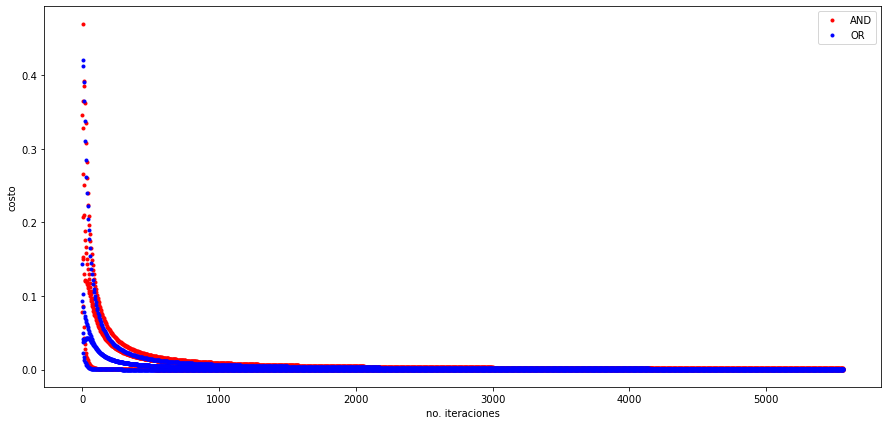

In [98]:
costoor=pd.DataFrame(costoOR)
#costo[0].plot()
#costo[1].plot()
costoand=pd.DataFrame(costoAND)
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(costoand,'r.',label='AND')
ax.plot(costoor,'b.',label='OR')

ax.set_xlabel('no. iteraciones')
ax.set_ylabel('costo')
ax.legend(loc='upper right')

In [83]:
i=2
h[0]=entrada(h,data,i)
print(h[0])
print(predict(h,w))

[[1.]
 [0.]]
[[0.98012226]
 [0.0315991 ]]


In [ ]:
def importa(archivo,nombres):
 data = pd.read_csv(archivo,sep=',',names=nombres,skiprows=0)#para archivo simple
 return data

In [ ]:

def entrada(h,data,i):
      h[0][0]=data.I1[i] 
      h[0][1]=data.I2[i]
      return h[0]

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def SE(y,h):
    return (y-h[1])**2

In [ ]:
def dC(y,h,n):
    return (-2*(y[n]-h[1][n]))
    

In [ ]:
def dh(z,n):
    return (sigmoid(z[n])*(1-sigmoid(z[n])))

In [ ]:
def dz(h):
    return h[0]

In [ ]:
etha=.5
nl1=2
nl2=2

w=np.array((np.random.rand(2,2)))
b=np.array((np.random.rand(2,1)))
h= np.array((np.random.rand(2,1),np.random.rand(2,1)))
y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])

In [ ]:
output_layer_nodes=2
epocs=200
for epoc in range(epocs):
 for i in data.index:
   h[0]=entrada(h,data,i)
   y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])
   z=w.dot(h[0])+b
   h[1]=sigmoid(z)
   c=MSE(y,h)
   #print(sum(c))
   for n in range(output_layer_nodes):
     Dw=etha*np.transpose(dz(h)*dh(z,n)*dC(y,h,n)) 
     w[n]=w[n]-Dw
     Db=etha*dh(z,n)*dC(y,h,n)
     b[n]=b[n]-Db  